Predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.

In [1]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# seaborn setup
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [3]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [4]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'active'),
  Text(1, 0, 'alco'),
  Text(2, 0, 'cardio'),
  Text(3, 0, 'cholesterol'),
  Text(4, 0, 'gender'),
  Text(5, 0, 'gluc'),
  Text(6, 0, 'smoke')])

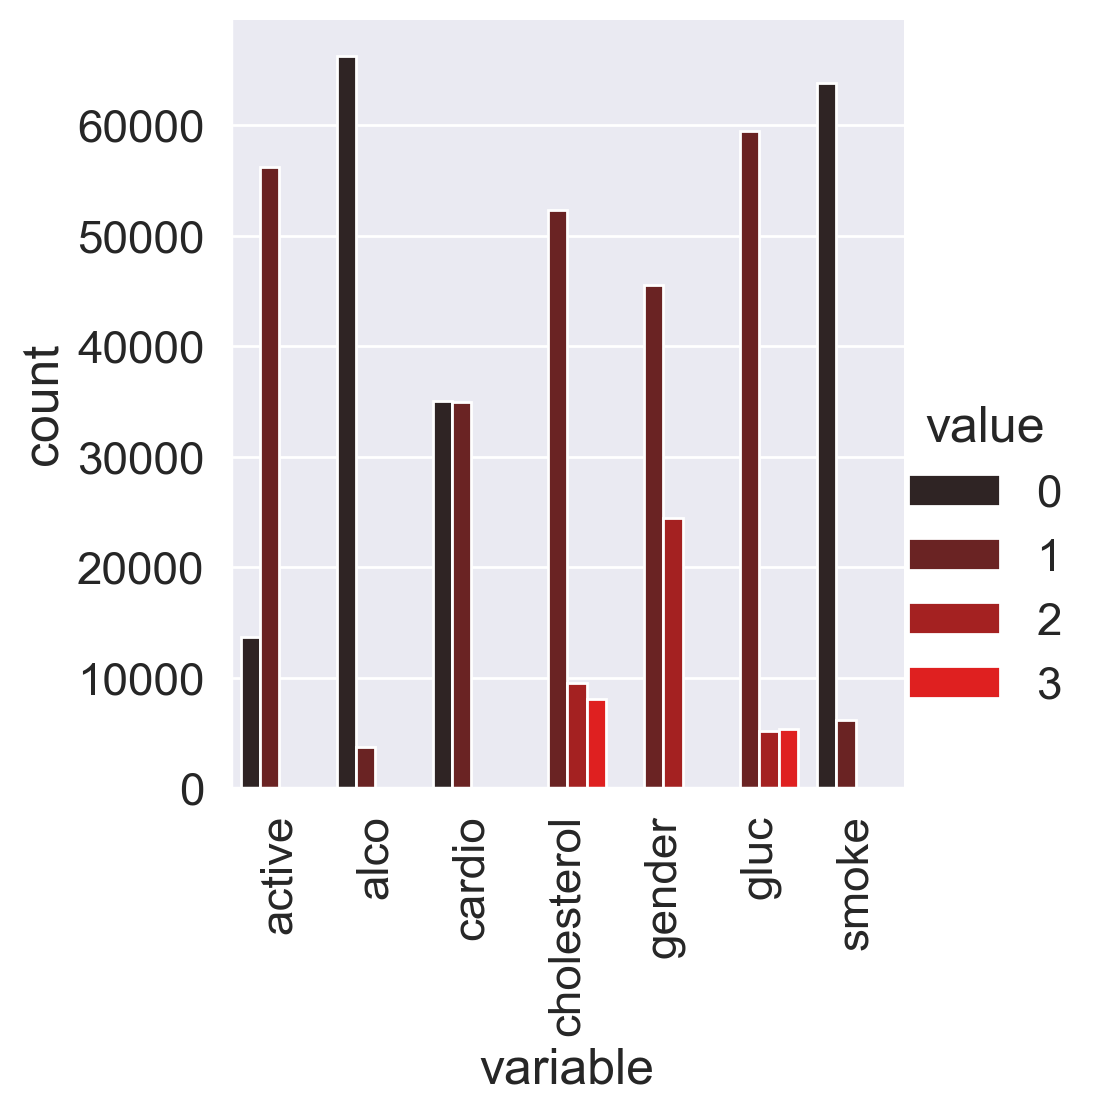

In [5]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar", color = "red"
)
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'active'),
  Text(1, 0, 'alco'),
  Text(2, 0, 'cholesterol'),
  Text(3, 0, 'gender'),
  Text(4, 0, 'gluc'),
  Text(5, 0, 'smoke')])

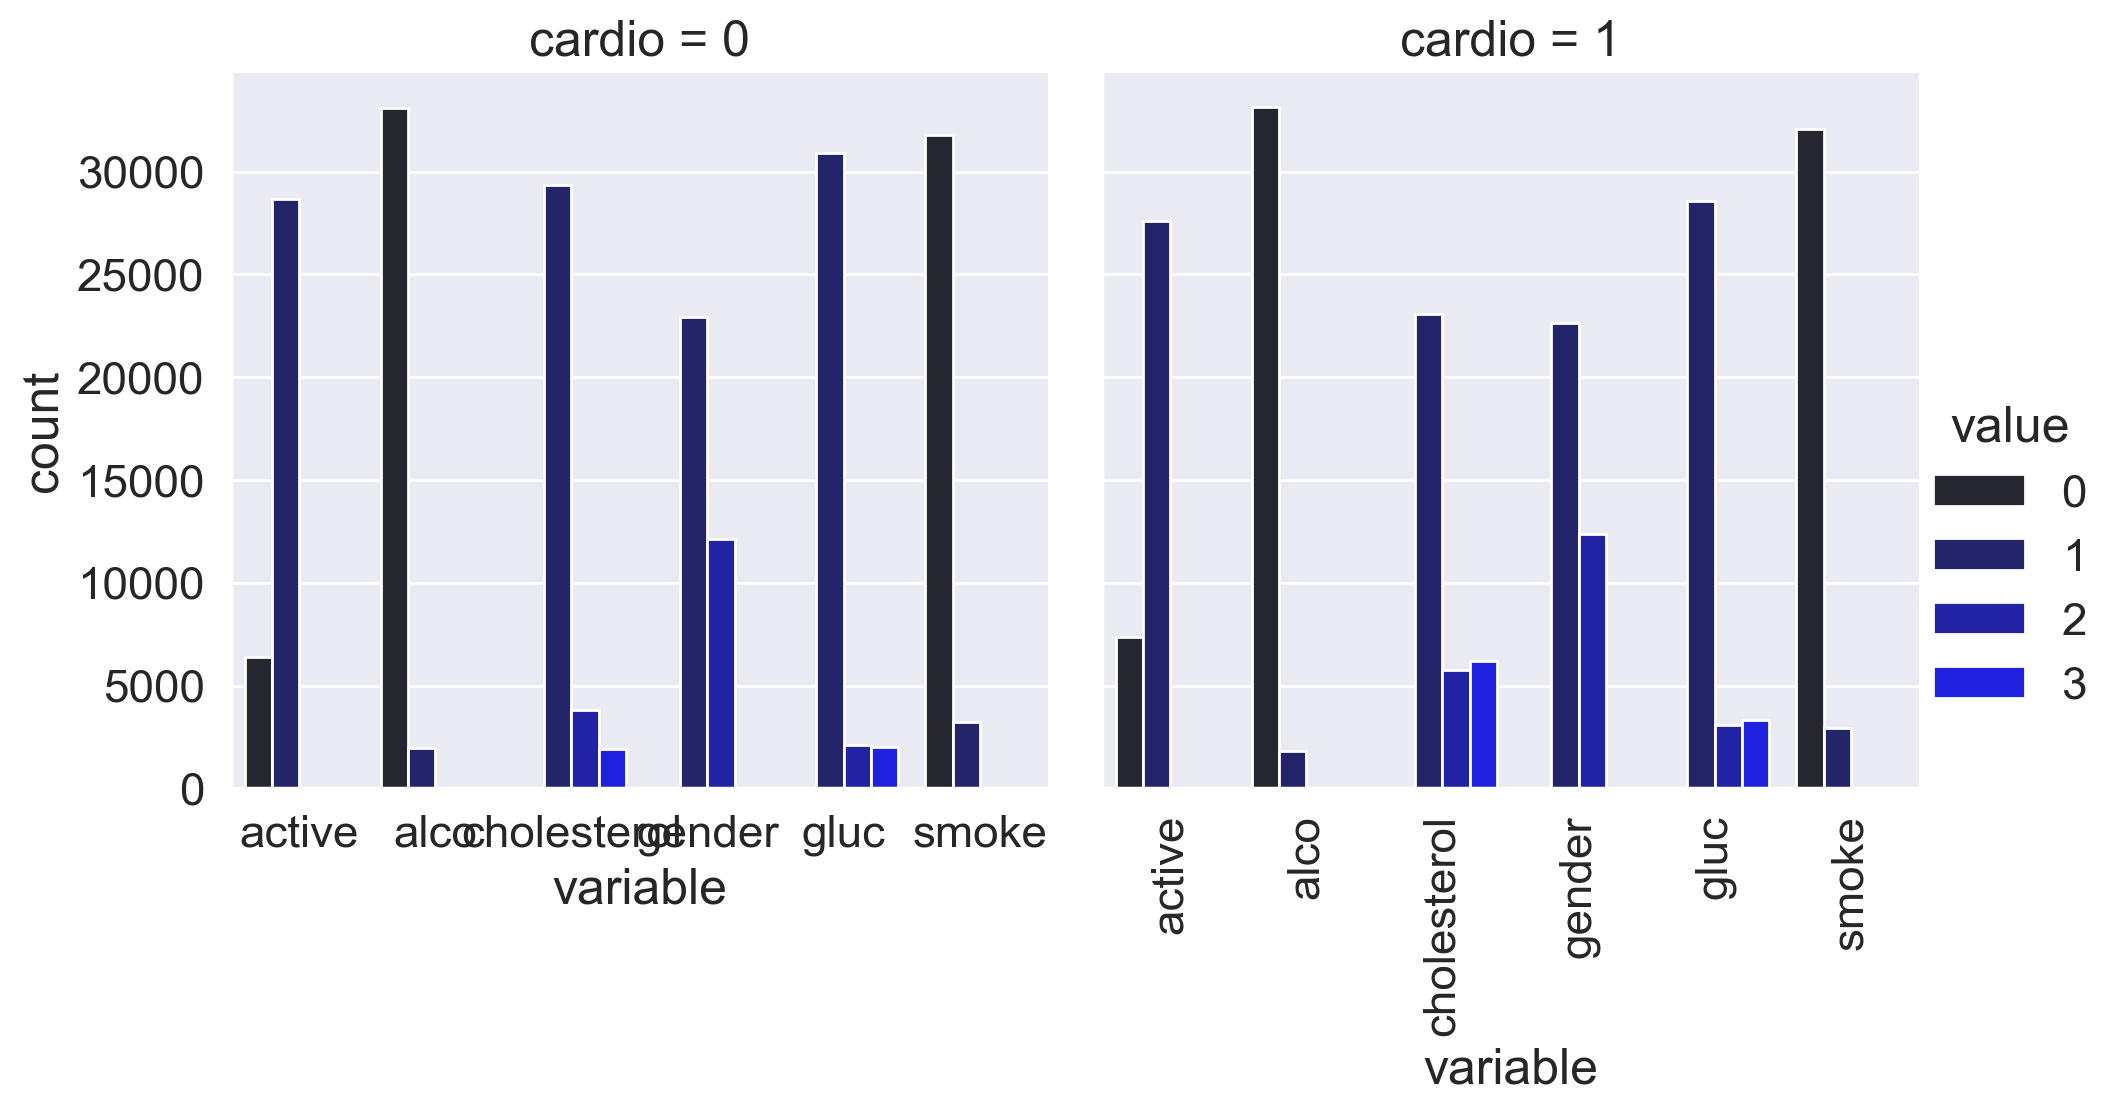

In [6]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
    color = "blue"
)
plt.xticks(rotation='vertical')

In [7]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [8]:
# how many men and women were in this study? calculate based on height
df.groupby("gender")["height"].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

1 represents women, 2 represents men; avg height: 45530 men and 24470 women (Option 1)

In [9]:
# who consumes alcohol more?
df.groupby("gender")["alco"].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

men (Option 2)

In [10]:
# What’s the rounded difference between the percentages of smokers among men and women?
(df.groupby("gender")['smoke'].mean())

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [11]:
(df.groupby("gender")['smoke'].mean()[2] - df.groupby("gender")['smoke'].mean()[1]) * 100

20.102390309976737

20% difference (Option 3)

In [12]:
# What’s the rounded difference between median values of age (in months) for non-smokers and smokers? 
df.describe()
# age is given in days
df.groupby('smoke')['age'].median() / (365.25)

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [13]:
# above we find the answer in years (54 years and 52.4)
(df.groupby('smoke')['age'].median()[0] - df.groupby('smoke')['age'].median()[1]) / 30.417
# we need the answer in days, so we divide by 30.417.

19.627182167866653

In [14]:
# Calculate age_years feature – round age to the nearest number of years. For this task, select only the people of age 60 to 64, inclusive.

# df['age_years'] = (df['age'] / 365)
# df['age_years'] = df[(df['age_years'] >= 60) & (df['age_years'] <= 64)]['age_years']

df["age_years"] = (df["age"] / 365.25).round().astype("int")

In [15]:
# Cholesterol level categories differ between the figure and our dataset. The conversion for the cholesterol feature is as follows: 4 mmol/l -> 1, 
# 5-7 mmol/l -> 2, 8 mmol/l -> 3.

In [16]:
df["age_years"].max()

65

In [17]:
np.int64(65)

65

In [18]:
smoking_old_men = df[
    (df["gender"] == 2)
    & (df["age_years"] >= 60)
    & (df["age_years"] < 65)
    & (df["smoke"] == 1)
]
smoking_old_men.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0,60
38,52,23388,2,162,72.0,130,80,1,1,1,0,1,1,64
67,90,22099,2,171,97.0,150,100,3,1,1,0,1,1,61
177,240,21848,2,170,69.0,120,80,1,1,1,1,1,0,60
182,248,22671,2,174,74.0,130,80,3,1,1,0,1,1,62


Question 1.5. (2 points). Calculate fractions of ill people (with CVD) in the two groups of people described in the task. What’s the ratio of these two fractions?

In [19]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 1) & (smoking_old_men["ap_hi"] < 120)
]["cardio"].mean()

0.2631578947368421

In [20]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 3) 
    & (smoking_old_men["ap_hi"] >= 160)
    & (smoking_old_men['ap_hi'] < 180)
]["cardio"].mean()

0.8636363636363636

In [21]:
np.divide(0.8638,0.2631)

3.283162295705055

Ratio is 3

Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilograms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25.

In [22]:
df['bmi'] = df['weight'] / ((df['height']/100) ** 2)

In [23]:
print("Median BMI:", df['bmi'].median())
print("men's and women's bmi:", df.groupby("gender")['bmi'].mean())

Median BMI: 26.374068120774975
men's and women's bmi: gender
1    27.987583
2    26.754442
Name: bmi, dtype: float64


In [24]:
# from above, 1 is False and 2 is True
# so ill people are defined as those with CVD - blood pressure: [160, 180) & cholestrol = 1
# Healthy people have higher median BMI than ill people - just false in general

# 4. In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women
df.groupby(["gender", "alco", "cardio"])["bmi"].median().to_frame()

bmi
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

Cleaning data

In [25]:
# Filter out the following patient segments (we consider these as erroneous data)
    # diastolic pressure is higher than systolic
    # height is strictly less than 2.5 percentile (Use pd.Series.quantile to compute this value. If you are not familiar with the function, please read the docs.)
    # height is strictly more than 97.5 percentile
    # weight is strictly less than 2.5 percentile
    # weight is strictly more than 97.5 percentile


In [26]:
df_to_remove = df[
    (df['ap_lo'] > df['ap_hi'])
    | (df['height'] < df['height'].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]

print(df_to_remove.shape[0] / df.shape[0])

filtered_df = df[~df.index.isin(df_to_remove)]

0.0963
